In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path_of_file = r'/home/rahul/WSL_Projects/ReferencesPython/Recurrent Neural Networks/RNNStockPricePredictor/Stock_price_prediction/Stocks/hpq.us.txt'
df = pd.read_csv(path_of_file,delimiter=',',
                usecols=['Date','Open','High','Low','Close'])

In [3]:
df.head()

,Date,Open,High,Low,Close
0,1970-01-02,0.30627,0.30627,0.30627,0.30627
1,1970-01-05,0.30627,0.31768,0.30627,0.31385
2,1970-01-06,0.31385,0.31385,0.30996,0.30996
3,1970-01-07,0.31385,0.31385,0.31385,0.31385
4,1970-01-08,0.31385,0.31768,0.31385,0.31385


In [4]:
df.tail()

,Date,Open,High,Low,Close
12070,2017-11-06,21.47,21.53,21.38,21.44
12071,2017-11-07,21.47,21.47,21.32,21.38
12072,2017-11-08,21.34,21.47,21.24,21.42
12073,2017-11-09,21.27,21.40,21.15,21.34
12074,2017-11-10,21.25,21.31,21.14,21.23


In [5]:
df = df.sort_values('Date')
df.head()

,Date,Open,High,Low,Close
0,1970-01-02,0.30627,0.30627,0.30627,0.30627
1,1970-01-05,0.30627,0.31768,0.30627,0.31385
2,1970-01-06,0.31385,0.31385,0.30996,0.30996
3,1970-01-07,0.31385,0.31385,0.31385,0.31385
4,1970-01-08,0.31385,0.31768,0.31385,0.31385


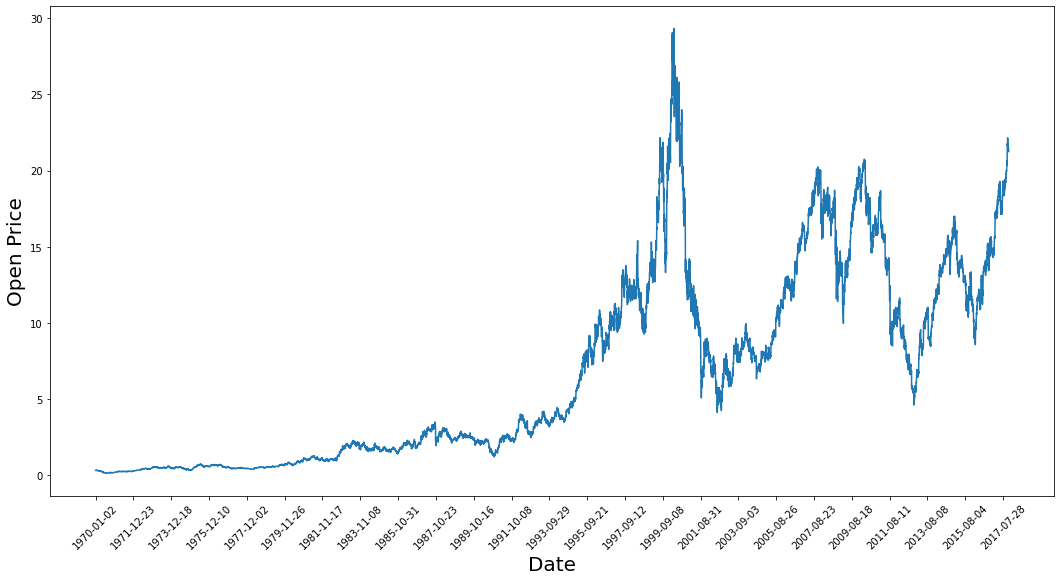

In [6]:
plt.figure(figsize=(18,9))
plt.plot(range(df.shape[0]),df['Open'])
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Open Price',fontsize=20)
plt.show()

In [7]:
D = df.iloc[:,1:2].values

In [8]:
D

array([[ 0.30627],
       [ 0.30627],
       [ 0.31385],
       ...,
       [21.34   ],
       [21.27   ],
       [21.25   ]])

In [9]:
D.shape

(12075, 1)

In [10]:
Tr_set = D[:10000] #train set
Ts_set = D[10000:] #test set

In [11]:
Tr_set.shape

(10000, 1)

In [12]:
Ts_set.shape

(2075, 1)

In [13]:
#regrssion problem and not classification problem
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.datasets import mnist
from keras.layers import Input, Dense, Dropout, Flatten, MaxPooling2D, MaxPooling1D, Conv2D, BatchNormalization, LSTM
from keras.models import Model, Sequential

In [14]:
sc = MinMaxScaler(feature_range=(0,1)) #scalar to scale data in between 0,1

In [15]:
Tr_scaled = sc.fit_transform(Tr_set) #scale data
Ts_scaled = sc.transform(Ts_set) #scale data (instead of embedding like we did for text)

In [16]:
seq_len = 100 #Create sequences of 100 or time steps of 100, so a sequence of 100 timesteps is associated with a single output
X_train = []
y_train = []
for i in range(seq_len,len(Tr_scaled)-seq_len):
    X_train.append(Tr_scaled[i-seq_len:i,0])
    y_train.append(Tr_scaled[i,0])

In [17]:
type(X_train)

list

In [18]:
X_train,y_train = np.array(X_train),np.array(y_train)

In [19]:
X_train[0]

array([0.00642261, 0.00642261, 0.00668211, 0.00668211, 0.00668211,
       0.00668211, 0.00681323, 0.00707548, 0.0069447 , 0.0069447 ,
       0.00720626, 0.00707548, 0.0069447 , 0.00720626, 0.00720626,
       0.00707548, 0.0069447 , 0.00681323, 0.00654893, 0.00642261,
       0.00628806, 0.00616002, 0.00616002, 0.00616002, 0.00589812,
       0.0057646 , 0.00628806, 0.00616002, 0.00616002, 0.00628806,
       0.00628806, 0.00642261, 0.00654893, 0.00654893, 0.00654893,
       0.00589812, 0.00589812, 0.00602547, 0.00602547, 0.00602547,
       0.00616002, 0.00563382, 0.00563382, 0.0057646 , 0.00563382,
       0.00550372, 0.00524353, 0.00537294, 0.00537294, 0.00524353,
       0.00524353, 0.00524353, 0.00550372, 0.00537294, 0.00524353,
       0.00524353, 0.00498094, 0.00498094, 0.00510933, 0.00510933,
       0.00498094, 0.00498094, 0.00524353, 0.00524353, 0.00510933,
       0.00445337, 0.00432636, 0.00445337, 0.00445337, 0.0047187 ,
       0.0047187 , 0.0047187 , 0.00458655, 0.0041901 , 0.00419

In [37]:
X_train.shape

(9800, 100, 1)

In [38]:
len(X_train[0])

100

In [21]:
y_train[0]

0.0014430320722864922

In [22]:
X_test = []
y_test = []
for i in range(seq_len,len(Ts_scaled)-seq_len):
    X_test.append(Ts_scaled[i-seq_len:i,0])
    y_test.append(Ts_scaled[i,0])

In [23]:
X_test,y_test = np.array(X_test),np.array(y_test)

In [24]:
X_train.shape #we have a total of 9800 sequences each with length 100

(9800, 100)

In [25]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #convert to 3d tensor

In [26]:
X_train.shape #shape of whole data set

(9800, 100, 1)

In [39]:
X_train[0].shape #shape of input

(100, 1)

In [27]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [28]:
X_test.shape

(1875, 100, 1)

In [29]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,
              input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.1))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(tf.keras.layers.GRU(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

2023-04-08 15:44:41.953961: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-08 15:44:41.984222: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-08 15:44:41.984304: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-08 15:44:41.989284: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-08 15:44:41.989662: I tensorflow/compile

In [30]:
model.compile(optimizer='adam',loss=tf.keras.losses.mse)

In [31]:
model.fit(X_train,y_train,epochs=5,batch_size=32)

Epoch 1/5


2023-04-08 15:44:57.819485: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8700
2023-04-08 15:44:58.296935: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f08c80ee7b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-04-08 15:44:58.297097: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 2070 with Max-Q Design, Compute Capability 7.5
2023-04-08 15:44:58.310685: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-04-08 15:44:58.555999: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


307/307 [==============================] - 25s 44ms/step - loss: 0.0020
Epoch 2/5
307/307 [==============================] - 11s 37ms/step - loss: 9.0822e-04
Epoch 3/5
307/307 [==============================] - 12s 38ms/step - loss: 7.3639e-04
Epoch 4/5
307/307 [==============================] - 11s 37ms/step - loss: 7.2819e-04
Epoch 5/5
307/307 [==============================] - 10s 34ms/step - loss: 6.2134e-04


In [32]:
y_hat = model.predict(X_test)

59/59 [==============================] - 3s 21ms/step


In [33]:
y_hat.shape

(1875, 1)

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 gru (GRU)                   (None, 50)                15300     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

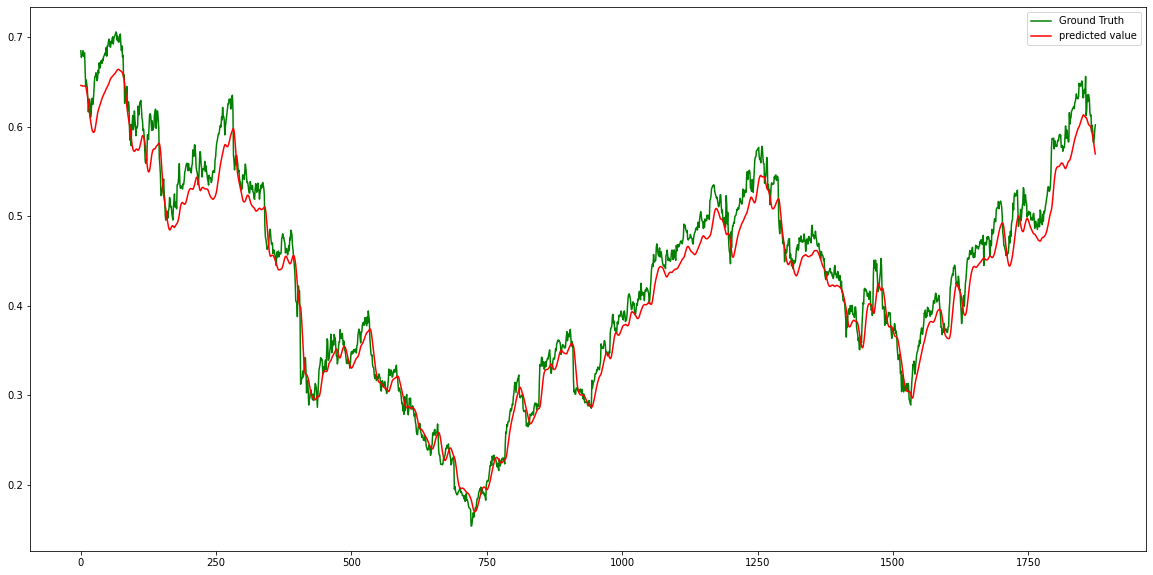

In [34]:
plt.figure(figsize=(20,10))
plt.plot(y_test,color='green',label='Ground Truth')
plt.plot(y_hat,color='red',label='predicted value')
plt.legend()
plt.show()